# Project 1 - King County WA House Price Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error


import warnings
warnings.filterwarnings('ignore')


# Import Data

In [2]:
df = pd.read_csv('kc_final.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe() #Statistica

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
# outlier +- mean +- 3std

In [7]:
df['bedrooms'].describe()

count    21613.000000
mean         3.370842
std          0.930062
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [8]:
3.370842 + 3*0.930062

6.161028

In [9]:
df= df[df['bedrooms']<10]

In [10]:
df.shape

(21608, 21)

In [11]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.160800e+04,2.160800e+04,21608.000000,21608.000000,21608.000000,2.160800e+04,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000,21608.000000
mean,4.580474e+09,5.400457e+05,3.368197,2.114552,2079.652582,1.510873e+04,1.494285,0.007544,0.234265,3.409339,7.656933,1788.304239,291.348343,1971.010274,84.329276,98077.942845,47.560040,-122.213886,1986.580387,12769.757173
std,2.876519e+09,3.671441e+05,0.903207,0.769905,918.284940,4.142511e+04,0.539998,0.086527,0.766305,0.650692,1.175525,828.104685,442.411884,29.370279,401.512854,53.505685,0.138575,0.140835,685.425404,27307.157393
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.215000e+05,3.000000,1.750000,1424.250000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470875,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.619000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068725e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,9.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [13]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")  # handles '10/13/2014'

In [14]:
df.corr()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.005432,-0.016680,0.002707,0.005382,-0.012150,-0.132132,0.018403,-0.002727,0.011743,...,0.008207,-0.010818,-0.004971,0.021499,-0.016706,-0.008287,-0.001900,0.020818,-0.002887,-0.138823
date,0.005432,1.000000,-0.004301,-0.015321,-0.034321,-0.034506,0.006299,-0.022567,0.001348,-0.001746,...,-0.039912,-0.027930,-0.019342,-0.000360,-0.024401,0.001387,-0.032825,-0.007053,-0.031552,0.002548
price,-0.016680,-0.004301,1.000000,0.316409,0.525092,0.702047,0.089683,0.256894,0.266398,0.397209,...,0.667455,0.605595,0.323642,0.053973,0.126547,-0.053100,0.306997,0.021590,0.585388,0.082469
bedrooms,0.002707,-0.015321,0.316409,1.000000,0.530069,0.592618,0.033233,0.181382,-0.006524,0.081925,...,0.368703,0.492167,0.308821,0.161156,0.018082,-0.157404,-0.010929,0.134942,0.404825,0.030830
bathrooms,0.005382,-0.034321,0.525092,0.530069,1.000000,0.754604,0.087821,0.500988,0.063796,0.187436,...,0.665150,0.685504,0.283159,0.506303,0.050580,-0.203773,0.024532,0.223103,0.568761,0.087258
sqft_living,-0.012150,-0.034506,0.702047,0.592618,0.754604,1.000000,0.172912,0.354025,0.103871,0.284482,...,0.762903,0.876652,0.434719,0.318234,0.055234,-0.199264,0.052508,0.240258,0.756570,0.183373
sqft_lot,-0.132132,0.006299,0.089683,0.033233,0.087821,0.172912,1.000000,-0.005189,0.021600,0.074720,...,0.113613,0.183541,0.015352,0.053043,0.007695,-0.129583,-0.085666,0.229512,0.144601,0.718554
floors,0.018403,-0.022567,0.256894,0.181382,0.500988,0.354025,-0.005189,1.000000,0.023705,0.029575,...,0.458353,0.523887,-0.245784,0.489679,0.006136,-0.059158,0.049633,0.125502,0.279981,-0.011259
waterfront,-0.002727,0.001348,0.266398,-0.006524,0.063796,0.103871,0.021600,0.023705,1.000000,0.401915,...,0.082775,0.072091,0.080659,-0.026182,0.092950,0.030283,-0.014267,-0.041920,0.086465,0.030699
view,0.011743,-0.001746,0.397209,0.081925,0.187436,0.284482,0.074720,0.029575,0.401915,1.000000,...,0.251215,0.167616,0.276737,-0.053664,0.104067,0.084996,0.006162,-0.078525,0.280351,0.072580


In [15]:
abs(df.corr()["price"]).sort_values(ascending=False)

price            1.000000
sqft_living      0.702047
grade            0.667455
sqft_above       0.605595
sqft_living15    0.585388
bathrooms        0.525092
view             0.397209
sqft_basement    0.323642
bedrooms         0.316409
lat              0.306997
waterfront       0.266398
floors           0.256894
yr_renovated     0.126547
sqft_lot         0.089683
sqft_lot15       0.082469
yr_built         0.053973
zipcode          0.053100
condition        0.036361
long             0.021590
id               0.016680
date             0.004301
Name: price, dtype: float64

<Axes: >

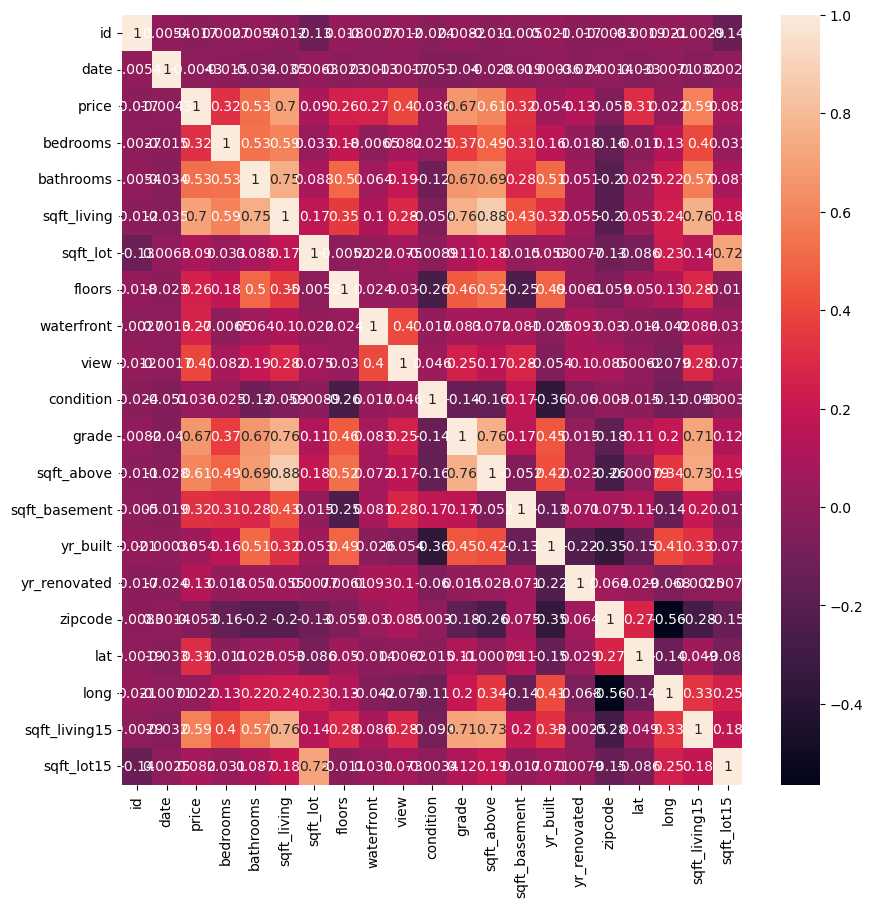

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot= True)

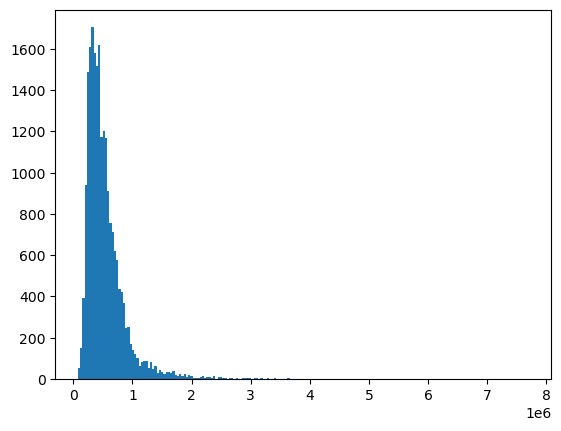

In [17]:
plt.hist(df['price'], bins=200);

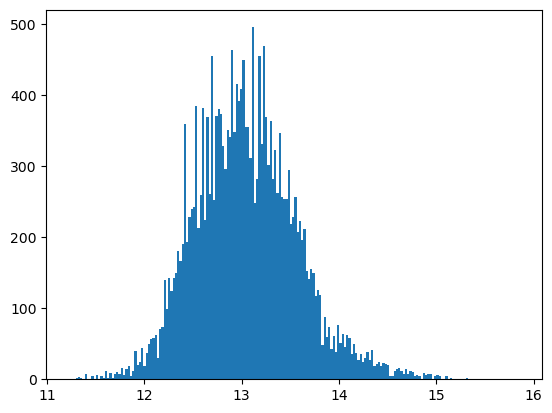

In [18]:
plt.hist(np.log(df['price']), bins=200);

## Feature Engineering

In [19]:
df['zipcode'] = df['zipcode'].astype('object')

In [20]:
df['age'] = 2023-df['yr_built']

In [21]:
df=df[df['bathrooms']<5]

In [22]:
df['bedrooms'] = df['bedrooms']**2

In [23]:
df['bathrooms'] = df['bathrooms']**2

In [24]:
df['basement'] = np.where(df['sqft_basement']>0,1,0)

In [25]:
df['renovated'] = np.where(df['yr_renovated']>0,1,0)

In [26]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age,basement,renovated
0,7129300520,2014-10-13,221900,9,1.0000,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,68,0,0
1,6414100192,2014-12-09,538000,9,5.0625,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,72,1,1
2,5631500400,2015-02-25,180000,4,1.0000,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,90,0,0
3,2487200875,2014-12-09,604000,16,9.0000,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,58,1,0
4,1954400510,2015-02-18,510000,9,4.0000,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,36,0,0


In [27]:
outliers = df.quantile(0.97)

In [28]:
df=df[df['price']<outliers['price']]
df=df[df['bedrooms']<outliers['bedrooms']]
df=df[df['sqft_living']<outliers['sqft_living']]

In [29]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,age,basement,renovated
count,1.898700e+04,18987,1.898700e+04,18987.000000,18987.000000,18987.000000,1.898700e+04,18987.000000,18987.000000,18987.000000,...,18987.000000,18987.000000,18987.000000,18987.000000,18987.000000,18987.000000,18987.000000,18987.000000,18987.000000,18987.000000
mean,4.606599e+09,2014-10-29 09:09:00.938536960,4.756754e+05,10.532101,4.447069,1900.034023,1.413062e+04,1.472086,0.003845,0.176384,...,238.061410,1970.531311,76.191289,47.556918,-122.215432,1896.184600,12172.482962,52.468689,0.361774,0.038184
min,1.200019e+06,2014-05-02 00:00:00,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000,8.000000,0.000000,0.000000
25%,2.130702e+09,2014-07-22 00:00:00,3.100000e+05,9.000000,2.250000,1367.500000,5.000000e+03,1.000000,0.000000,0.000000,...,0.000000,1951.000000,0.000000,47.459400,-122.332000,1460.000000,5000.000000,27.000000,0.000000,0.000000
50%,3.904980e+09,2014-10-16 00:00:00,4.300000e+05,9.000000,4.000000,1800.000000,7.428000e+03,1.000000,0.000000,0.000000,...,0.000000,1974.000000,0.000000,47.567700,-122.238000,1780.000000,7500.000000,49.000000,0.000000,0.000000
75%,7.347100e+09,2015-02-17 00:00:00,5.950000e+05,16.000000,6.250000,2340.000000,1.018250e+04,2.000000,0.000000,0.000000,...,460.000000,1996.000000,0.000000,47.680000,-122.125000,2250.000000,9793.500000,72.000000,1.000000,0.000000
max,9.900000e+09,2015-05-27 00:00:00,1.355000e+06,16.000000,22.562500,4073.000000,1.651359e+06,3.500000,1.000000,4.000000,...,2030.000000,2015.000000,2015.000000,47.777600,-121.315000,5790.000000,560617.000000,123.000000,1.000000,1.000000
std,2.882828e+09,NaN,2.204582e+05,4.290055,2.757998,707.024877,3.867486e+04,0.541431,0.061888,0.653262,...,374.446004,29.228885,382.416512,0.141431,0.143058,596.630495,25442.527774,29.228885,0.480526,0.191645


In [30]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'age', 'basement',
       'renovated'],
      dtype='object')

## Modeling

In [31]:
x=df[['bedrooms', 'bathrooms', 'sqft_living','grade','zipcode',
      'basement','waterfront','floors','age','renovated','sqft_above']]

In [32]:
y = df['price']

In [33]:
x = pd.get_dummies(x, drop_first= True)

In [34]:
x.head()

,bedrooms,bathrooms,sqft_living,grade,basement,waterfront,floors,age,renovated,sqft_above,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,9,1.0000,1180,7,0,0,1.0,68,0,1180,...,False,False,False,False,False,False,True,False,False,False
1,9,5.0625,2570,7,1,0,2.0,72,1,2170,...,False,False,False,False,False,False,False,False,False,False
2,4,1.0000,770,6,0,0,1.0,90,0,770,...,False,False,False,False,False,False,False,False,False,False
3,16,9.0000,1960,7,1,0,1.0,58,0,1050,...,False,False,False,False,False,False,False,False,False,False
4,9,4.0000,1680,8,0,0,1.0,36,0,1680,...,False,False,False,False,False,False,False,False,False,False


In [35]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.20, random_state = 42)

In [36]:
lr=LinearRegression()
model = lr.fit(x_train, y_train)

In [37]:
pred = model.predict(x_test)

In [38]:
r2_score(pred, y_test)

0.7635357929750093

In [39]:
mean_squared_error(pred,y_test)**0.5

96585.36898864982

In [40]:
R= Ridge()
L= Lasso()
EN= ElasticNet()

In [41]:
R.fit(x_train, y_train)
L.fit(x_train, y_train)
EN.fit(x_train, y_train)

ElasticNet()

In [42]:
predr = R.predict(x_test)
predl = L.predict(x_test)
preden = EN.predict(x_test)

In [43]:
r2_score(predr, y_test)

0.7603495362707292

In [44]:
r2_score(predl, y_test)

0.7633893196920638

In [45]:
r2_score(preden, y_test)

0.0022697392635336877

In [46]:
ETR = ExtraTreeRegressor()

In [47]:
ETR.fit(x_train, y_train)

ExtraTreeRegressor()

In [48]:
predetr = ETR.predict(x_test)

In [49]:
r2_score(predetr, y_test)

0.6195114140781206

In [50]:
def algo_test(x,y):
  
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
          
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13)
    
    algos = [L,E,R,Lass,ETR,GBR]
    algo_names = ['Linear','ElasticNet','Ridge','Lasso','Extra Tree','Gradient Boosting']
    r_squared = []
    rmse = []
    mae = []
        
    result = pd.DataFrame(columns = ['R_Squared','RMSE','MAE'],index = algo_names)
       
    for algo in algos:
        algo.fit(x_train,y_train)
             
        r_squared.append(r2_score(y_test,algo.predict(x_test)))
        rmse.append(mean_squared_error(y_test, algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test, algo.predict(x_test)))

    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE= mae
    
    return result.sort_values('R_Squared', ascending=False)

In [51]:
algo_test(x,y)

,R_Squared,RMSE,MAE
Lasso,0.803057,95486.916331,67998.094074
Linear,0.803040,95491.186311,68008.442390
Ridge,0.802988,95503.649775,68013.099950
Gradient Boosting,0.733416,111094.237374,83060.132105
Extra Tree,0.603765,135441.208682,90455.401374
ElasticNet,0.534192,146851.164545,112166.318066
